In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/train-data1/train(1).csv
/kaggle/input/satimg-test-pure/test.csv


In [3]:
df=pd.read_csv("/kaggle/input/train-data1/train(1).csv")

In [4]:
dft=pd.read_csv("/kaggle/input/satimg-test-pure/test.csv")

In [18]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [19]:
dft.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [20]:
X=df.drop(columns=["lat","long"])
y=df['price']

In [21]:
Xt=dft.drop(columns=["lat","long"])


In [22]:
X.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,3,7,1810,0,1961,0,98055,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,4,7,1600,0,1992,0,98031,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,3,8,1720,0,1994,0,98003,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,3,7,1150,90,2009,0,98027,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,3,7,1280,0,1994,0,98042,1590,8071


In [23]:
Xt.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,2390,7700
1,7974200820,20140821T000000,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,2370,6283
2,7701450110,20140815T000000,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,3710,9685
3,9522300010,20150331T000000,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,4050,14226
4,9510861140,20140714T000000,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,2250,4050


In [24]:
X["basement_ratio"]=(X["sqft_basement"])/X["sqft_living"]
print(X["basement_ratio"].describe())

count    16209.000000
mean         0.123670
std          0.170447
min          0.000000
25%          0.000000
50%          0.000000
75%          0.271777
max          0.666667
Name: basement_ratio, dtype: float64


In [25]:
X["basement_ratio"].head()

0    0.000000
1    0.000000
2    0.000000
3    0.072581
4    0.000000
Name: basement_ratio, dtype: float64

In [26]:
X["above_ratio"]=(X['sqft_above'])/X["sqft_living"]
print(X["above_ratio"].describe())
X["above_ratio"].head()

count    16209.000000
mean         0.876330
std          0.170447
min          0.333333
25%          0.728223
50%          1.000000
75%          1.000000
max          1.000000
Name: above_ratio, dtype: float64


0    1.000000
1    1.000000
2    1.000000
3    0.927419
4    1.000000
Name: above_ratio, dtype: float64

In [27]:
X["rlt_size"]=(X["sqft_living"])/X["sqft_living15"]
print(X["rlt_size"].describe())
X["rlt_size"].head()

count    16209.000000
mean         1.052406
std          0.321827
min          0.179012
25%          0.879433
50%          1.000000
75%          1.161512
max          6.000000
Name: rlt_size, dtype: float64


0    1.090361
1    0.930233
2    0.919786
3    1.000000
4    0.805031
Name: rlt_size, dtype: float64

In [28]:
X["rlt_lot_size"]=(X["sqft_lot"])/X["sqft_lot15"]
print(X["rlt_lot_size"].describe())
X["rlt_lot_size"].head()

count    16209.000000
mean         1.128817
std          1.318828
min          0.054972
25%          0.935720
50%          1.000000
75%          1.088765
max         87.527179
Name: rlt_lot_size, dtype: float64


0    1.000000
1    0.773370
2    1.158685
3    0.940000
4    1.654814
Name: rlt_lot_size, dtype: float64

In [29]:
X["quality_liv"]=X["sqft_living"]*X["grade"]
print(X["quality_liv"].describe())
X["quality_liv"].head()

count     16209.000000
mean      16674.878709
std       10056.118218
min         290.000000
25%       10080.000000
50%       14140.000000
75%       20560.000000
max      156650.000000
Name: quality_liv, dtype: float64


0    12670
1    11200
2    13760
3     8680
4     8960
Name: quality_liv, dtype: int64

In [30]:
X["quality_cond"]=X["grade"]*X["condition"]
print(X["quality_cond"].describe())
X["quality_cond"].head()

count    16209.000000
mean        25.968228
std          5.752283
min          1.000000
25%         21.000000
50%         24.000000
75%         28.000000
max         60.000000
Name: quality_cond, dtype: float64


0    21
1    28
2    24
3    21
4    21
Name: quality_cond, dtype: int64

In [31]:
X["view_flag"]=np.where(df["view"]>=3,1,0)
X["view_flag"].describe()

count    16209.000000
mean         0.037510
std          0.190014
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: view_flag, dtype: float64

In [32]:
X["water_view"]=X["waterfront"]*X["view"]
print(X["water_view"].describe())
X["water_view"].tail()

count    16209.000000
mean         0.025973
std          0.314199
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: water_view, dtype: float64


16204    0
16205    0
16206    0
16207    0
16208    0
Name: water_view, dtype: int64

In [33]:
X["luxury_bool"]=np.where((df["grade"]>=10) & (df["view"]>=3),1,0)
print(X["luxury_bool"].value_counts())
print(X["luxury_bool"].describe())

luxury_bool
0    16022
1      187
Name: count, dtype: int64
count    16209.000000
mean         0.011537
std          0.106791
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: luxury_bool, dtype: float64


In [34]:
X["lot_util"]=X["sqft_living"]/X["sqft_lot"]
print(X["lot_util"].describe())
X["lot_util"].head()

count    16209.000000
mean         0.325815
std          0.271695
min          0.000610
25%          0.156902
50%          0.247906
75%          0.411207
max          4.653846
Name: lot_util, dtype: float64


0    0.195887
1    0.573888
2    0.199120
3    1.758865
4    0.095837
Name: lot_util, dtype: float64

In [35]:
X["bath_per_bed"]=np.where(X["bedrooms"]==0, 5,X["bathrooms"]/X["bedrooms"])
print(X["bath_per_bed"].describe())

count    16209.000000
mean         0.642948
std          0.231988
min          0.000000
25%          0.500000
50%          0.625000
75%          0.750000
max          5.000000
Name: bath_per_bed, dtype: float64


In [36]:
X['date_col'] = pd.to_datetime(X['date'])
X['year']=X['date_col'].dt.year
X['year'].head()

0    2015
1    2014
2    2015
3    2015
4    2014
Name: year, dtype: int32

In [37]:
X["house_life"]=np.where(X["year"]<X["yr_built"],0,
                         X['year']-X['yr_built'])
X["house_life"].describe()

count    16209.000000
mean        43.169906
std         29.372863
min          0.000000
25%         17.000000
50%         39.000000
75%         63.000000
max        115.000000
Name: house_life, dtype: float64

In [38]:
X['ren_age']=np.where(X['yr_renovated']!=0,
                      X['year']-X['yr_renovated'],
                      X['house_life'])
X['ren_age']=np.where(X['ren_age']<0,0,X['ren_age'])
X['ren_age'].describe()

count    16209.000000
mean        40.814547
std         28.784124
min          0.000000
25%         15.000000
50%         37.000000
75%         60.000000
max        115.000000
Name: ren_age, dtype: float64

In [39]:
print(X.shape)
X.head()

(16209, 34)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,quality_cond,view_flag,water_view,luxury_bool,lot_util,bath_per_bed,date_col,year,house_life,ren_age
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,21,0,0,0,0.195887,0.562500,2015-05-05,2015,54,54
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,28,0,0,0,0.573888,0.833333,2014-07-08,2014,22,22
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,24,0,0,0,0.199120,0.625000,2015-01-15,2015,21,21
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,21,0,0,0,1.758865,1.125000,2015-04-27,2015,6,6
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,21,0,0,0,0.095837,0.666667,2014-12-05,2014,20,20


In [40]:
X1=X.drop(columns=["bathrooms","yr_built",
                   "sqft_above","sqft_basement","sqft_lot",
                   "sqft_lot15","sqft_living15","view",
                   "condition","yr_renovated","date_col",
                  "date","year"])
X1.shape

(16209, 21)

In [51]:
X1.columns

Index(['id', 'price', 'bedrooms', 'sqft_living', 'floors', 'waterfront',
       'grade', 'zipcode', 'basement_ratio', 'above_ratio', 'rlt_size',
       'rlt_lot_size', 'quality_liv', 'quality_cond', 'view_flag',
       'water_view', 'luxury_bool', 'lot_util', 'bath_per_bed', 'house_life',
       'ren_age'],
      dtype='object')

In [41]:
X1.head()

,id,price,bedrooms,sqft_living,floors,waterfront,grade,zipcode,basement_ratio,above_ratio,...,rlt_lot_size,quality_liv,quality_cond,view_flag,water_view,luxury_bool,lot_util,bath_per_bed,house_life,ren_age
0,9117000170,268643,4,1810,2.0,0,7,98055,0.000000,1.000000,...,1.000000,12670,21,0,0,0,0.195887,0.562500,54,54
1,6700390210,245000,3,1600,2.0,0,7,98031,0.000000,1.000000,...,0.773370,11200,28,0,0,0,0.573888,0.833333,22,22
2,7212660540,200000,4,1720,2.0,0,8,98003,0.000000,1.000000,...,1.158685,13760,24,0,0,0,0.199120,0.625000,21,21
3,8562780200,352499,2,1240,2.0,0,7,98027,0.072581,0.927419,...,0.940000,8680,21,0,0,0,1.758865,1.125000,6,6
4,7760400350,232000,3,1280,1.0,0,7,98042,0.000000,1.000000,...,1.654814,8960,21,0,0,0,0.095837,0.666667,20,20


In [42]:
def find_outlier(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
    return outliers

In [43]:
ratio_cols = [
    "basement_ratio", "above_ratio",
    "rlt_size", "rlt_lot_size",
    "lot_util", "bath_per_bed"
]

for col in ratio_cols:
    outl=find_outlier(X1,col)
    ske=X1[col].skew()
    print(col,"skew ",ske,outl.sum())

basement_ratio skew  0.9200915784996443 0
above_ratio skew  -0.9200915784996426 0
rlt_size skew  2.0655827613017275 1098
rlt_lot_size skew  34.272401963708226 2935
lot_util skew  2.4310222658635006 1023
bath_per_bed skew  3.842502078222737 379


In [52]:
print(X1['lot_util'].describe())
X1["rlt_size"].describe()


count    16209.000000
mean         0.315529
std          0.232469
min          0.000610
25%          0.156902
50%          0.247906
75%          0.411207
max          1.000000
Name: lot_util, dtype: float64


count    16209.000000
mean         1.045906
std          0.291878
min          0.179012
25%          0.879433
50%          1.000000
75%          1.161512
max          2.000000
Name: rlt_size, dtype: float64

In [45]:
print(X['lot_util'].describe())
print(X["rlt_size"].describe())
X1['lot_util']=X['lot_util'].clip(0,1)
X1['rlt_size']=X['rlt_size'].clip(0,2)
print(X1['lot_util'].describe())
X1["rlt_size"].describe()

count    16209.000000
mean         0.325815
std          0.271695
min          0.000610
25%          0.156902
50%          0.247906
75%          0.411207
max          4.653846
Name: lot_util, dtype: float64
count    16209.000000
mean         1.052406
std          0.321827
min          0.179012
25%          0.879433
50%          1.000000
75%          1.161512
max          6.000000
Name: rlt_size, dtype: float64
count    16209.000000
mean         0.315529
std          0.232469
min          0.000610
25%          0.156902
50%          0.247906
75%          0.411207
max          1.000000
Name: lot_util, dtype: float64


count    16209.000000
mean         1.045906
std          0.291878
min          0.179012
25%          0.879433
50%          1.000000
75%          1.161512
max          2.000000
Name: rlt_size, dtype: float64

In [46]:
X1['bath_per_bed'].describe()
X1['bath_per_bed']=X['bath_per_bed'].clip(0,1.5)
X1['bath_per_bed'].describe()

count    16209.000000
mean         0.640766
std          0.209196
min          0.000000
25%          0.500000
50%          0.625000
75%          0.750000
max          1.500000
Name: bath_per_bed, dtype: float64

In [47]:
print(X['rlt_lot_size'].describe())
X1['rlt_lot_size'] = np.log1p(X['rlt_lot_size'].clip(0, 3))
X1['rlt_lot_size'].describe()

count    16209.000000
mean         1.128817
std          1.318828
min          0.054972
25%          0.935720
50%          1.000000
75%          1.088765
max         87.527179
Name: rlt_lot_size, dtype: float64


count    16209.000000
mean         0.713321
std          0.157741
min          0.053514
25%          0.660479
50%          0.693147
75%          0.736573
max          1.386294
Name: rlt_lot_size, dtype: float64

In [48]:
ratio_cols = [
    "basement_ratio", "above_ratio",
    "rlt_size", "rlt_lot_size",
    "lot_util", "bath_per_bed"
]

for col in ratio_cols:
    outl=find_outlier(X1,col)
    ske=X1[col].skew()
    print(col,"skew ",ske,outl.sum())

basement_ratio skew  0.9200915784996443 0
above_ratio skew  -0.9200915784996426 0
rlt_size skew  0.9836859872909219 1098
rlt_lot_size skew  1.4952454664901742 2900
lot_util skew  1.3799763063550166 1023
bath_per_bed skew  0.6420907812038855 379


In [49]:
X1.to_csv("preprocessed1.csv", index=False)


In [50]:
X1.head()

,id,price,bedrooms,sqft_living,floors,waterfront,grade,zipcode,basement_ratio,above_ratio,...,rlt_lot_size,quality_liv,quality_cond,view_flag,water_view,luxury_bool,lot_util,bath_per_bed,house_life,ren_age
0,9117000170,268643,4,1810,2.0,0,7,98055,0.000000,1.000000,...,0.693147,12670,21,0,0,0,0.195887,0.562500,54,54
1,6700390210,245000,3,1600,2.0,0,7,98031,0.000000,1.000000,...,0.572882,11200,28,0,0,0,0.573888,0.833333,22,22
2,7212660540,200000,4,1720,2.0,0,8,98003,0.000000,1.000000,...,0.769499,13760,24,0,0,0,0.199120,0.625000,21,21
3,8562780200,352499,2,1240,2.0,0,7,98027,0.072581,0.927419,...,0.662688,8680,21,0,0,0,1.000000,1.125000,6,6
4,7760400350,232000,3,1280,1.0,0,7,98042,0.000000,1.000000,...,0.976374,8960,21,0,0,0,0.095837,0.666667,20,20


# EDA

In [66]:
X2=X1.copy()

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

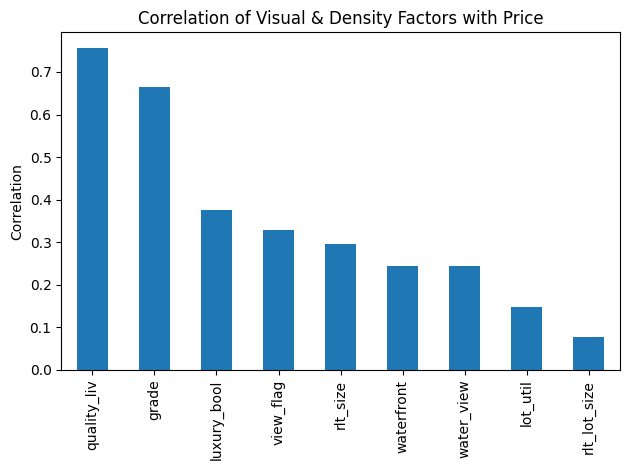

In [67]:
visual_cols = [
    "waterfront", "water_view", "view_flag", "luxury_bool",
    "rlt_size", "rlt_lot_size", "lot_util", "quality_liv", "grade"
]

corr = X2[visual_cols + ["price"]].corr()["price"].sort_values(ascending=False)

plt.figure()
corr.drop("price").plot(kind="bar")
plt.title("Correlation of Visual & Density Factors with Price")
plt.ylabel("Correlation")
plt.tight_layout()
plt.show()

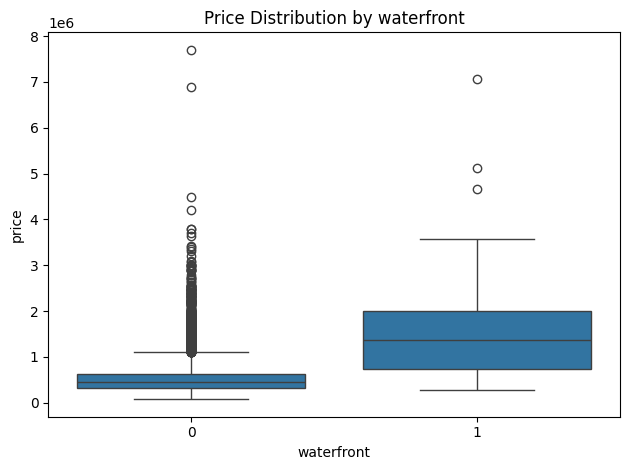

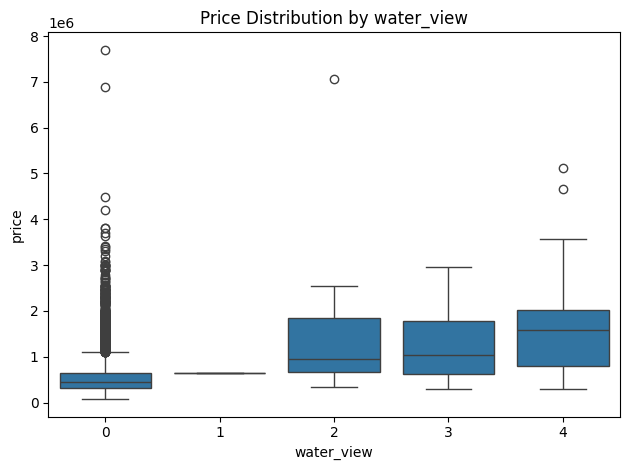

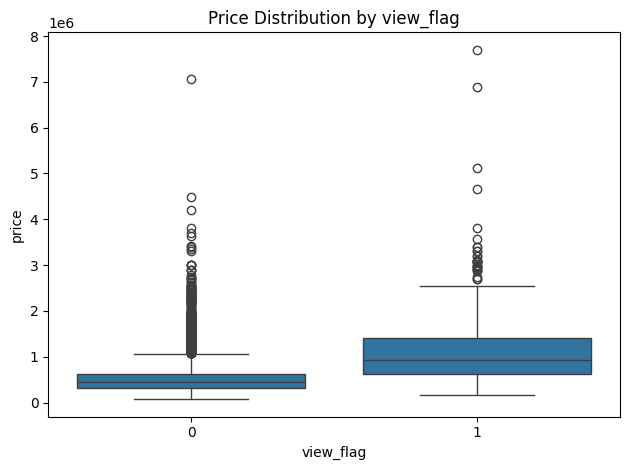

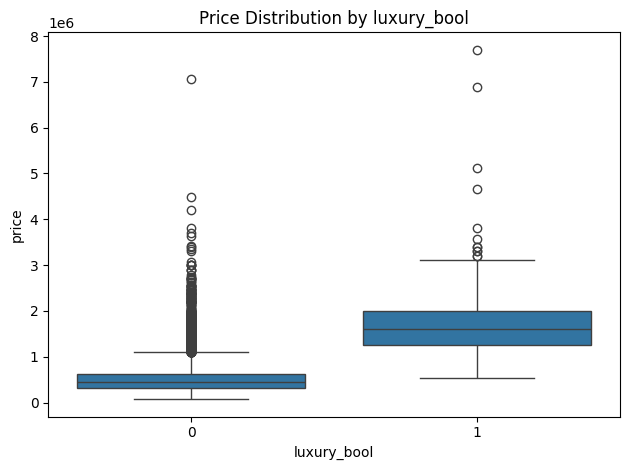

In [68]:
# Price distribution by visual features

binary_visuals = ["waterfront", "water_view", "view_flag", "luxury_bool"]

for col in binary_visuals:
    plt.figure()
    sns.boxplot(x=col, y="price", data=X2)
    plt.title(f"Price Distribution by {col}")
    plt.tight_layout()
    plt.show()

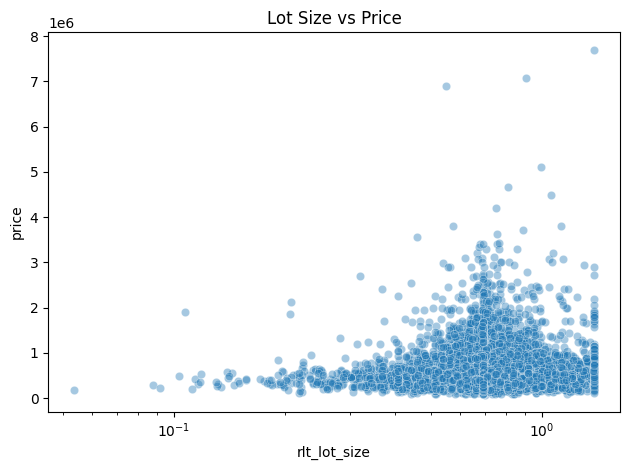

In [60]:
plt.figure()
sns.scatterplot(
    x="rlt_lot_size",
    y="price",
    data=X1,
    alpha=0.4
)
plt.xscale("log")
plt.title("Lot Size vs Price")
plt.tight_layout()
plt.show()

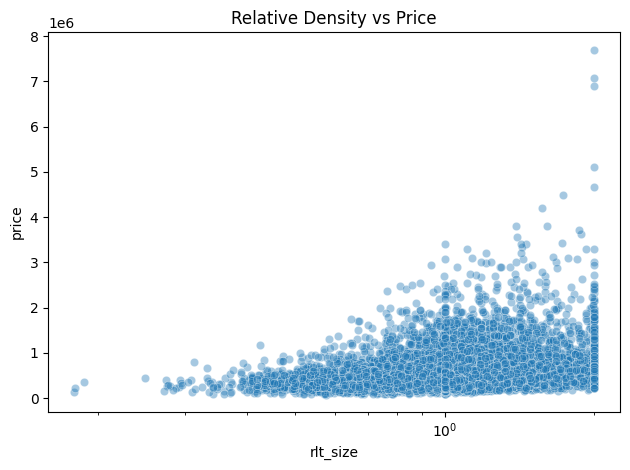

In [69]:
plt.figure()
sns.scatterplot(
    x="rlt_size",
    y="price",
    data=X2,
    alpha=0.4
)
plt.xscale("log")
plt.title("Relative Density vs Price")
plt.tight_layout()
plt.show()

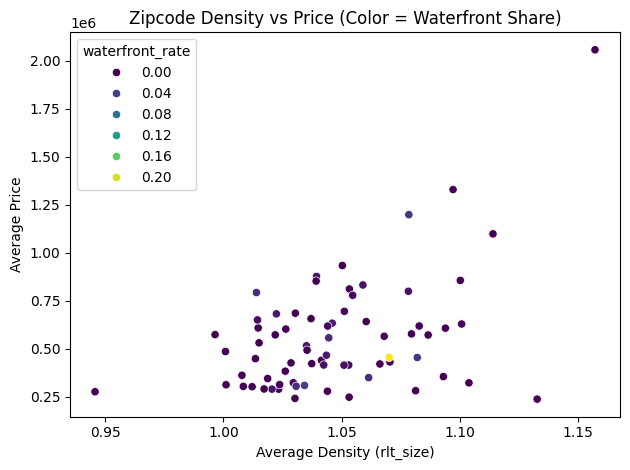

In [73]:
# Simpler, clearer plot: density vs price, color = waterfront presence

zip_agg = (
    X2.groupby("zipcode")
    .agg(
        mean_price=("price", "mean"),
        waterfront_rate=("waterfront", "mean"),
        density_mean=("rlt_size", "mean"),
        count=("price", "size")
    )
    .reset_index()
)

zip_agg = zip_agg[zip_agg["count"] > 20]

plt.figure()
sns.scatterplot(
    data=zip_agg,
    x="density_mean",
    y="mean_price",
    hue="waterfront_rate",
    palette="viridis"
)

plt.xlabel("Average Density (rlt_size)")
plt.ylabel("Average Price")
plt.title("Zipcode Density vs Price (Color = Waterfront Share)")
plt.tight_layout()
plt.show()


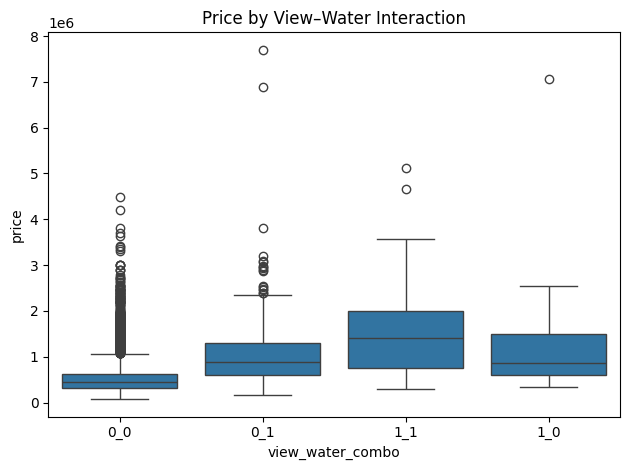

In [72]:
X2["view_water_combo"] = (
    X2["waterfront"].astype(str) + "_" + X2["view_flag"].astype(str)
)

plt.figure()
sns.boxplot(
    x="view_water_combo",
    y="price",
    data=X2
)
plt.title("Price by View–Water Interaction")
plt.tight_layout()
plt.show()

# Test Dataset Preprocessing

In [74]:
Xt["basement_ratio"] = (Xt["sqft_basement"]) / Xt["sqft_living"]
print(Xt["basement_ratio"].describe())
Xt["basement_ratio"].head()




count    5404.000000
mean        0.127000
std         0.172517
min         0.000000
25%         0.000000
50%         0.000000
75%         0.279483
max         0.635802
Name: basement_ratio, dtype: float64


0    0.000000
1    0.368966
2    0.000000
3    0.000000
4    0.000000
Name: basement_ratio, dtype: float64

In [75]:
Xt["above_ratio"] = (Xt["sqft_above"]) / Xt["sqft_living"]
print(Xt["above_ratio"].describe())
Xt["above_ratio"].head()



count    5404.000000
mean        0.873000
std         0.172517
min         0.364198
25%         0.720517
50%         1.000000
75%         1.000000
max         1.000000
Name: above_ratio, dtype: float64


0    1.000000
1    0.631034
2    1.000000
3    1.000000
4    1.000000
Name: above_ratio, dtype: float64

In [76]:
Xt["rlt_size"] = (Xt["sqft_living"]) / Xt["sqft_living15"]
print(Xt["rlt_size"].describe())
Xt["rlt_size"].head()


count    5404.000000
mean        1.054524
std         0.316289
min         0.200000
25%         0.886622
50%         1.000000
75%         1.159324
max         5.101562
Name: rlt_size, dtype: float64


0    0.866109
1    1.223629
2    1.016173
3    1.125926
4    1.133333
Name: rlt_size, dtype: float64

In [77]:

Xt["rlt_lot_size"] = (Xt["sqft_lot"]) / Xt["sqft_lot15"]
print(Xt["rlt_lot_size"].describe())
Xt["rlt_lot_size"].head()



count    5404.000000
mean        1.146924
std         1.155882
min         0.109368
25%         0.941006
50%         1.000000
75%         1.105467
max        44.389138
Name: rlt_lot_size, dtype: float64


0    1.154935
1    1.071144
2    1.124729
3    1.026852
4    1.327407
Name: rlt_lot_size, dtype: float64

In [78]:
Xt["quality_liv"] = Xt["sqft_living"] * Xt["grade"]
print(Xt["quality_liv"].describe())
Xt["quality_liv"].head()

Xt["quality_cond"] = Xt["grade"] * Xt["condition"]
print(Xt["quality_cond"].describe())
Xt["quality_cond"].head()

count      5404.000000
mean      16970.915063
std       10693.029413
min        1536.000000
25%       10080.000000
50%       14280.000000
75%       20737.500000
max      162480.000000
Name: quality_liv, dtype: float64
count    5404.000000
mean       26.074944
std         5.839463
min         5.000000
25%        21.000000
50%        24.000000
75%        28.000000
max        60.000000
Name: quality_cond, dtype: float64


0    32
1    40
2    33
3    36
4    27
Name: quality_cond, dtype: int64

In [79]:
Xt["quality_liv"] = Xt["sqft_living"] * Xt["grade"]
print(Xt["quality_liv"].describe())
Xt["quality_liv"].head()



count      5404.000000
mean      16970.915063
std       10693.029413
min        1536.000000
25%       10080.000000
50%       14280.000000
75%       20737.500000
max      162480.000000
Name: quality_liv, dtype: float64


0    16560
1    23200
2    41470
3    54720
4    22950
Name: quality_liv, dtype: int64

In [80]:
Xt["quality_cond"] = Xt["grade"] * Xt["condition"]
print(Xt["quality_cond"].describe())
Xt["quality_cond"].head()

count    5404.000000
mean       26.074944
std         5.839463
min         5.000000
25%        21.000000
50%        24.000000
75%        28.000000
max        60.000000
Name: quality_cond, dtype: float64


0    32
1    40
2    33
3    36
4    27
Name: quality_cond, dtype: int64

In [81]:
Xt["view_flag"] = np.where(dft["view"] >= 3, 1, 0)
Xt["view_flag"].describe()



count    5404.000000
mean        0.040896
std         0.198067
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: view_flag, dtype: float64

In [82]:
Xt["water_view"] = Xt["waterfront"] * Xt["view"]
print(Xt["water_view"].describe())
Xt["water_view"].tail()



count    5404.000000
mean        0.035714
std         0.371606
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: water_view, dtype: float64


5399    0
5400    0
5401    0
5402    0
5403    0
Name: water_view, dtype: int64

In [83]:
Xt["luxury_bool"] = np.where((dft["grade"] >= 10) & (dft["view"] >= 3), 1, 0)
print(Xt["luxury_bool"].value_counts())
print(Xt["luxury_bool"].describe())


luxury_bool
0    5325
1      79
Name: count, dtype: int64
count    5404.000000
mean        0.014619
std         0.120032
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: luxury_bool, dtype: float64


In [84]:
Xt["lot_util"] = Xt["sqft_living"] / Xt["sqft_lot"]
print(Xt["lot_util"].describe())
Xt["lot_util"].head()



count    5404.000000
mean        0.317536
std         0.258877
min         0.000787
25%         0.155367
50%         0.247059
75%         0.395455
max         2.187500
Name: lot_util, dtype: float64


0    0.232767
1    0.430906
2    0.346094
3    0.312158
4    0.474330
Name: lot_util, dtype: float64

In [85]:
Xt["bath_per_bed"] = np.where(Xt["bedrooms"] == 0, 5, Xt["bathrooms"] / Xt["bedrooms"])
print(Xt["bath_per_bed"].describe())

Xt["date_col"] = pd.to_datetime(Xt["date"])
Xt["year"] = Xt["date_col"].dt.year
Xt["year"].head()

count    5404.000000
mean        0.645165
std         0.252038
min         0.142857
25%         0.500000
50%         0.625000
75%         0.750000
max         5.000000
Name: bath_per_bed, dtype: float64


0    2014
1    2014
2    2014
3    2015
4    2014
Name: year, dtype: int32

In [86]:
Xt["house_life"] = np.where(
    Xt["year"] < Xt["yr_built"], 
    0,
    Xt["year"] - Xt["yr_built"]
)
Xt["house_life"].describe()


count    5404.000000
mean       43.763694
std        29.378286
min         0.000000
25%        19.000000
50%        40.000000
75%        63.000000
max       115.000000
Name: house_life, dtype: float64

In [87]:

Xt["ren_age"] = np.where(
    Xt["yr_renovated"] != 0,
    Xt["year"] - Xt["yr_renovated"],
    Xt["house_life"]
)
Xt["ren_age"] = np.where(Xt["ren_age"] < 0, 0, Xt["ren_age"])
Xt["ren_age"].describe()

count    5404.000000
mean       41.307365
std        28.896743
min         0.000000
25%        16.000000
50%        37.000000
75%        60.250000
max       115.000000
Name: ren_age, dtype: float64

In [88]:
Xt1 = Xt.drop(columns=[
    "bathrooms", "yr_built",
    "sqft_above", "sqft_basement", "sqft_lot",
    "sqft_lot15", "sqft_living15", "view",
    "condition", "yr_renovated", "date_col",
    "date", "year"
])
Xt1.shape


for col in ratio_cols:
    outl = find_outlier(Xt1, col)
    ske = Xt1[col].skew()
    print(col, "skew ", ske, outl.sum())




basement_ratio skew  0.8956011479094848 0
above_ratio skew  -0.8956011479094871 0
rlt_size skew  1.9378058564324059 397
rlt_lot_size skew  20.35139326282225 977
lot_util skew  2.1727406725926937 336
bath_per_bed skew  5.258667012200925 127


In [89]:
Xt1['lot_util'] = Xt['lot_util'].clip(0, 1)
Xt1['rlt_size'] = Xt['rlt_size'].clip(0, 2)

print(Xt1['lot_util'].describe())
Xt1["rlt_size"].describe()




count    5404.000000
mean        0.309032
std         0.226658
min         0.000787
25%         0.155367
50%         0.247059
75%         0.395455
max         1.000000
Name: lot_util, dtype: float64


count    5404.000000
mean        1.048817
std         0.289875
min         0.200000
25%         0.886622
50%         1.000000
75%         1.159324
max         2.000000
Name: rlt_size, dtype: float64

In [90]:
Xt1['bath_per_bed'].describe()
Xt1['bath_per_bed'] = Xt['bath_per_bed'].clip(0, 1.5)
Xt1['bath_per_bed'].describe()




count    5404.000000
mean        0.641394
std         0.213002
min         0.142857
25%         0.500000
50%         0.625000
75%         0.750000
max         1.500000
Name: bath_per_bed, dtype: float64

In [91]:
print(Xt['rlt_lot_size'].describe())
Xt1['rlt_lot_size'] = np.log1p(Xt['rlt_lot_size'].clip(0, 3))
Xt1['rlt_lot_size'].describe()


count    5404.000000
mean        1.146924
std         1.155882
min         0.109368
25%         0.941006
50%         1.000000
75%         1.105467
max        44.389138
Name: rlt_lot_size, dtype: float64


count    5404.000000
mean        0.719967
std         0.167317
min         0.103791
25%         0.663206
50%         0.693147
75%         0.744537
max         1.386294
Name: rlt_lot_size, dtype: float64

In [92]:


for col in ratio_cols:
    outl = find_outlier(Xt1, col)
    ske = Xt1[col].skew()
    print(col, "skew ", ske, outl.sum())

basement_ratio skew  0.8956011479094848 0
above_ratio skew  -0.8956011479094871 0
rlt_size skew  0.9723316136621921 397
rlt_lot_size skew  1.5414683264566575 1001
lot_util skew  1.422306465616496 336
bath_per_bed skew  0.6683507506598564 127


In [93]:
Xt1.to_csv("preprocessed_test.csv", index=False)


In [94]:
print(Xt1.shape)
Xt1.head()

(5404, 20)


,id,bedrooms,sqft_living,floors,waterfront,grade,zipcode,basement_ratio,above_ratio,rlt_size,rlt_lot_size,quality_liv,quality_cond,view_flag,water_view,luxury_bool,lot_util,bath_per_bed,house_life,ren_age
0,2591820310,4,2070,2.0,0,8,98058,0.000000,1.000000,0.866109,0.767761,16560,32,0,0,0,0.232767,0.562500,28,28
1,7974200820,5,2900,1.0,0,8,98115,0.368966,0.631034,1.223629,0.728101,23200,40,0,0,0,0.430906,0.600000,37,37
2,7701450110,4,3770,2.0,0,11,98006,0.000000,1.000000,1.016173,0.753644,41470,33,0,0,0,0.346094,0.625000,17,17
3,9522300010,3,4560,2.0,0,12,98034,0.000000,1.000000,1.125926,0.706484,54720,36,0,0,0,0.312158,1.166667,25,25
4,9510861140,3,2550,2.0,0,9,98052,0.000000,1.000000,1.133333,0.844755,22950,27,0,0,0,0.474330,0.833333,10,10
